In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('datamart_Train.csv')
ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#here we have 5 numerical and 7 catagorical feature.

In [7]:
ds.shape[0]

8523

In [8]:
#Check for Duplicate
dsUnique = len(set(ds.Item_Identifier))
dsTotal = ds.shape[0]
dsDupli = dsTotal - dsUnique
dsDupli

6964

In [9]:
ds.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
numeric_features = ds.select_dtypes(include=[np.number])

In [11]:
numeric_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


# Correlation

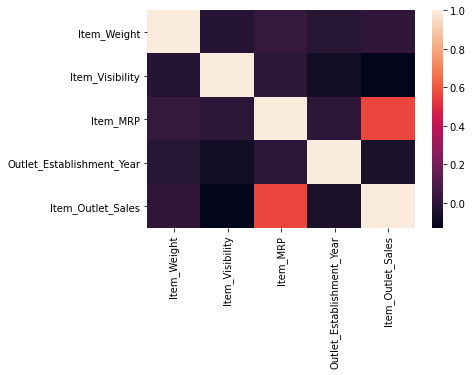

In [12]:
sns.heatmap(numeric_features.corr())

In [13]:
#here we see that sales is least dependent on Item Visiblity and Highly sependent on item Mrp

# Distrubtion of sales

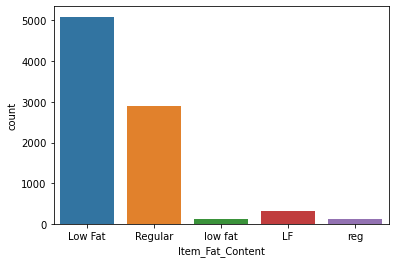

In [14]:
sns.countplot(ds.Item_Fat_Content)

Low fat item has highest number of sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

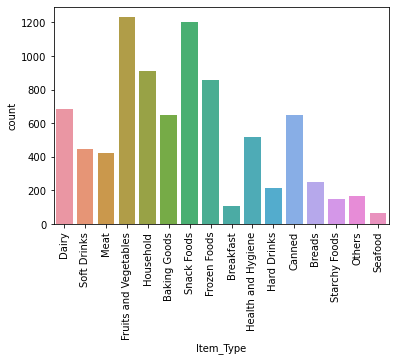

In [15]:
sns.countplot(ds.Item_Type)
plt.xticks(rotation=90)

we see fruits and vegitable had highest while sea food has lowest

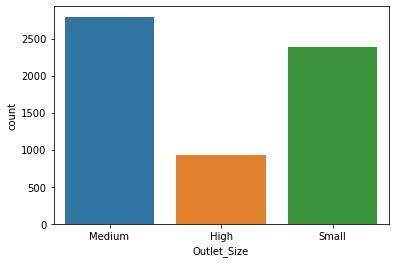

In [16]:
sns.countplot(ds.Outlet_Size)

Big store are usually sell less so its bad choice to invest on them


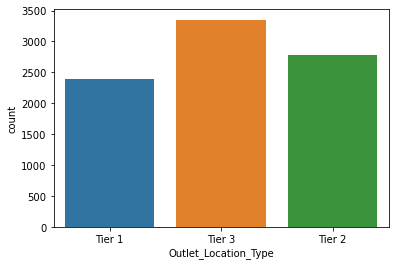

In [17]:
sns.countplot(ds.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

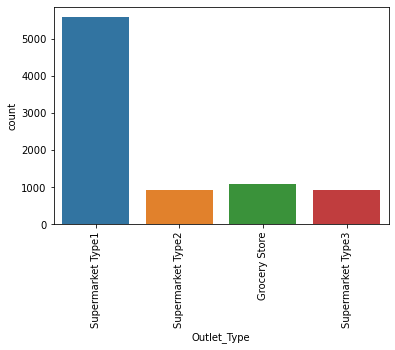

In [18]:
sns.countplot(ds.Outlet_Type)
plt.xticks(rotation=90)

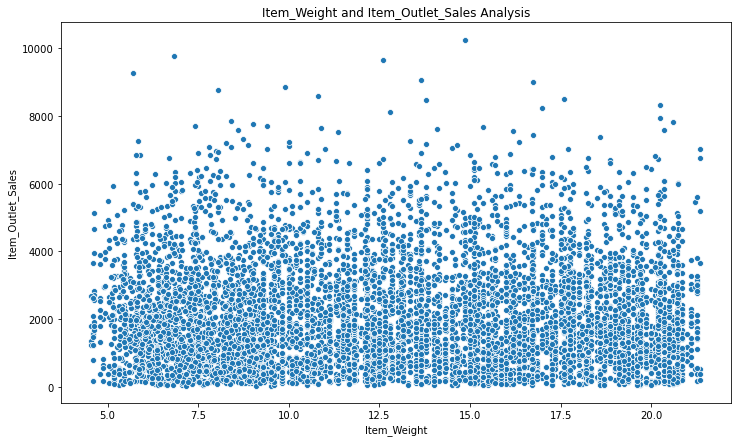

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
sns.scatterplot(ds['Item_Weight'], ds["Item_Outlet_Sales"])

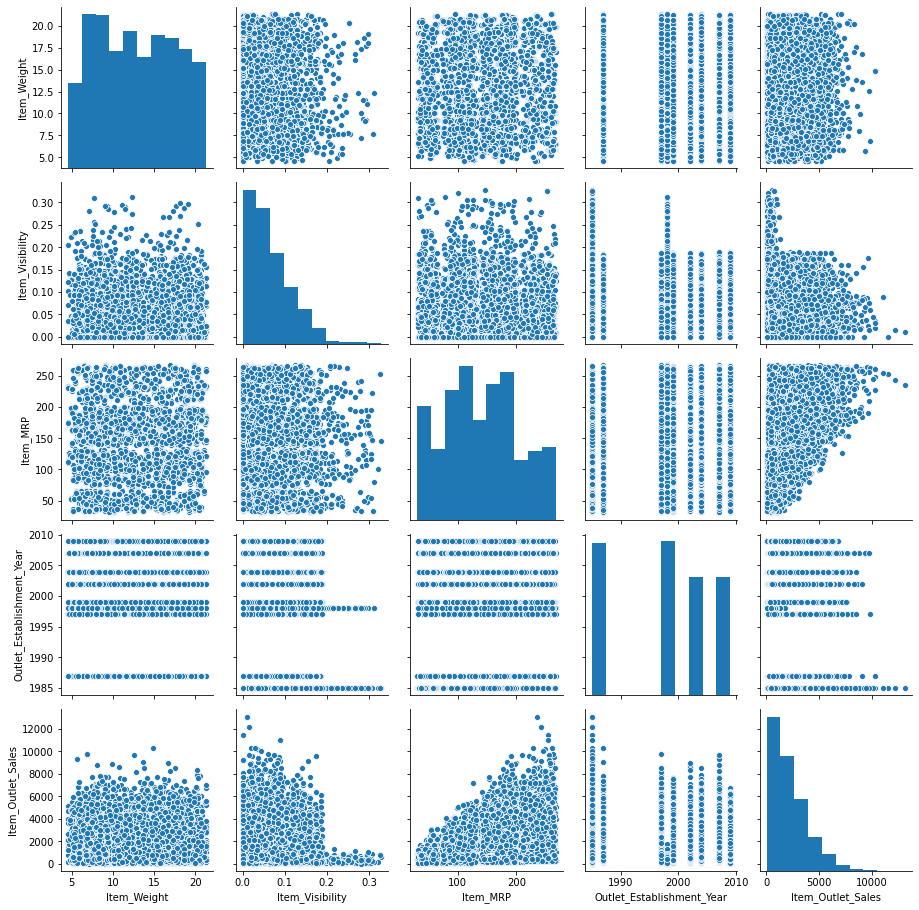

In [20]:
sns.pairplot(ds)

# Sales of fat content

In [21]:
d1 = ds.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales")
d1

,Item_Outlet_Sales
Item_Fat_Content,
LF,2073.551928
Low Fat,2164.477336
Regular,2235.186702
low fat,2087.740737
reg,1962.192268


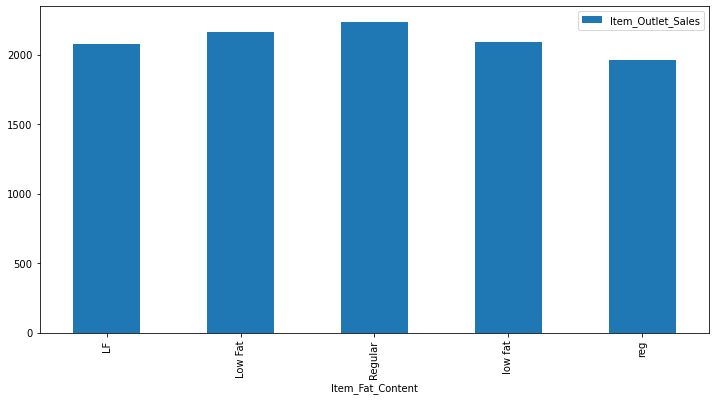

In [22]:
d1.plot(kind='bar', figsize=(12,6))

we see low fat product has more sale then regular fat product

# Sales of outlet

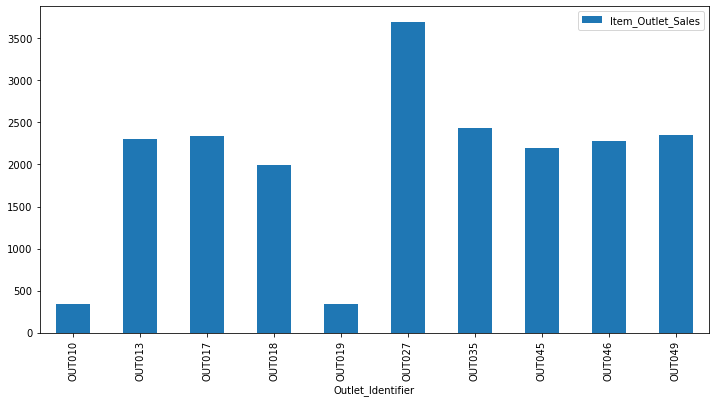

In [23]:
d2 = ds.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales")
d2.plot(kind='bar', figsize=(12,6))

we see that outlet OUT027 has the highest sales

# Sales of Item Type

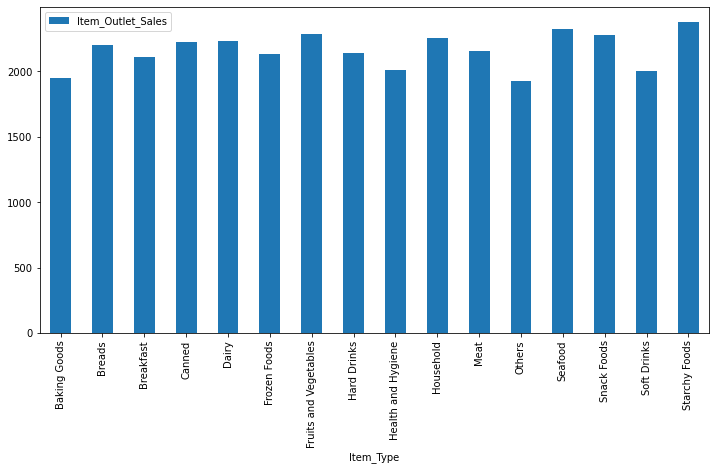

In [24]:
d2 = ds.pivot_table(index='Item_Type', values="Item_Outlet_Sales")
d2.plot(kind='bar', figsize=(12,6))

In [25]:
d2.sort_values(by="Item_Outlet_Sales")

,Item_Outlet_Sales
Item_Type,
Others,1926.139702
Baking Goods,1952.971207
Soft Drinks,2006.511735
Health and Hygiene,2010.000265
Breakfast,2111.808651
Frozen Foods,2132.867744
Hard Drinks,2139.221622
Meat,2158.977911
Breads,2204.132226


we see that Stracky foods has highest number of sales

# Sales according to year

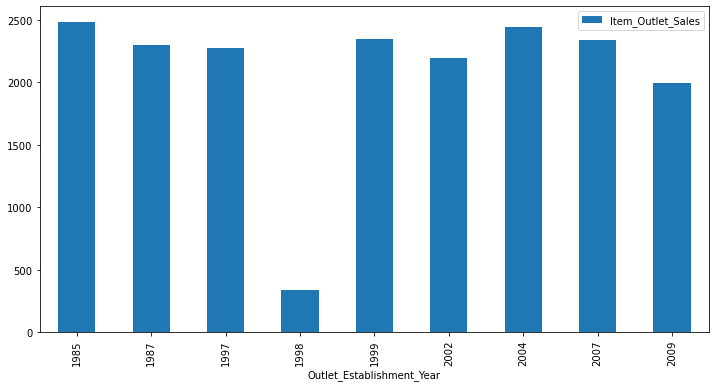

In [26]:
d3 = ds.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales")
d3.plot(kind='bar', figsize=(12,6))

we seee not much relation by year factor only in one year the sales was too low but that can be of because of many outside factor which was componsated in next year

# Data Processing

Handeling missing Value of train dataset

In [27]:
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

here we see that value are missed in item weight as well as in outlet size and as the number of missing units are more then 10% of data so dropping is not a good option so we will proceed with filling values with mode in outlet size and with mean in item weight

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imp=SimpleImputer(strategy='most_frequent')
ds['Outlet_Size']=imp.fit_transform(ds['Outlet_Size'].values.reshape(-1,1))

In [30]:
imp1=SimpleImputer(strategy='mean')
ds['Item_Weight']=imp1.fit_transform(ds['Item_Weight'].values.reshape(-1,1))

Handeling missing data of test dataset

In [31]:
test=pd.read_csv('bigdatamart_Test.csv')

In [32]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [33]:
test.shape

(5681, 11)

In [35]:
test['Outlet_Size']=imp.fit_transform(test['Outlet_Size'].values.reshape(-1,1))
test['Item_Weight']=imp1.fit_transform(test['Item_Weight'].values.reshape(-1,1))

In [36]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [38]:
ds['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
# Dropping irrelevant columns

ds=ds.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

# Building ML MODEL

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    ds[i] = le.fit_transform(ds[i])
    test[i] = le.fit_transform(test[i])

In [40]:
ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [50]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(ds[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = ds.index
te_oh.index = test.index

tr_fe = pd.concat([ds, tr_oh], axis=1)
te_fe = pd.concat([test, te_oh], axis=1)

In [51]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [53]:
tr_fe

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,1,2,443.4228,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1,0,2097.2700,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1,2,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,0,2,994.7052,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,2778.3834,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,1,1,549.2850,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,2,1,1193.1136,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,1,2,1845.5976,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [54]:
x=tr_fe.drop('Item_Outlet_Sales', axis = 1)

In [55]:
y=tr_fe['Item_Outlet_Sales']

In [56]:
lr=LinearRegression()
max_score=0
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_score:
        max_score=r2
        final=i
print('max r2 score corrosponding to' ,final ,'is', max_score)

max r2 score corrosponding to 62 is 0.5828991641334763


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=62, test_size=0.20)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))

0.5828991641334763
1206201.501376912
803.1382189094485


In [58]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr,x,y,cv=5).mean())

0.5582178593299483


In [60]:
psales=lr.predict(te_fe)

In [61]:
df=pd.DataFrame(psales)
df.to_csv('predict sales.csv')

In [62]:
import joblib
joblib.dump(lr,"Sales.pkl")

['Sales.pkl']